In [16]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [18]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [19]:
x_train=x_train/255.0
x_test=x_test/255.0

In [21]:
DataAugmentation=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1

)
DataAugmentation.fit(x_train)

In [22]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(2,2),
    layers.Dropout(.25),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
history=model.fit(DataAugmentation.flow(x_train,y_train,batch_size=64),epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.9732 - loss: 0.0908 - val_accuracy: 0.9938 - val_loss: 0.0167
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9742 - loss: 0.0898 - val_accuracy: 0.9933 - val_loss: 0.0184
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.9749 - loss: 0.0861 - val_accuracy: 0.9943 - val_loss: 0.0156
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9768 - loss: 0.0813 - val_accuracy: 0.9939 - val_loss: 0.0164
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9760 - loss: 0.0789 - val_accuracy: 0.9940 - val_loss: 0.0178
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9770 - loss: 0.0784 - val_accuracy: 0.9939 - val_loss: 0.0161
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9783 - loss: 0.0742 - val_accuracy: 0.9930 - val_loss: 0.0188
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9760 - loss: 0.0802 - 

In [28]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print("Test Accurccy = ",test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.9944 - loss: 0.0164
Test Accurccy =  0.9944000244140625


In [30]:
img=x_test[0].reshape(1,28,28,1)
prediction=model.predict(img)
print("predict label: ",np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predict label:  7


In [36]:
predictions=model.predict(x_test)
y_predict=[np.argmax(i)for i in predictions ]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
tf.Tensor(
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    1 1027    0    0    0    0    3    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  979    0    2    0    0    1]
 [   0    0    0    6    0  884    1    0    0    1]
 [   1    5    0    0    1    1  949    0    1    0]
 [   0    2    2    0    2    0    0 1021    1    0]
 [   0    1    0    2    0    1    0    0  969    1]
 [   0    0    0    0    4    2    0    4    2  997]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

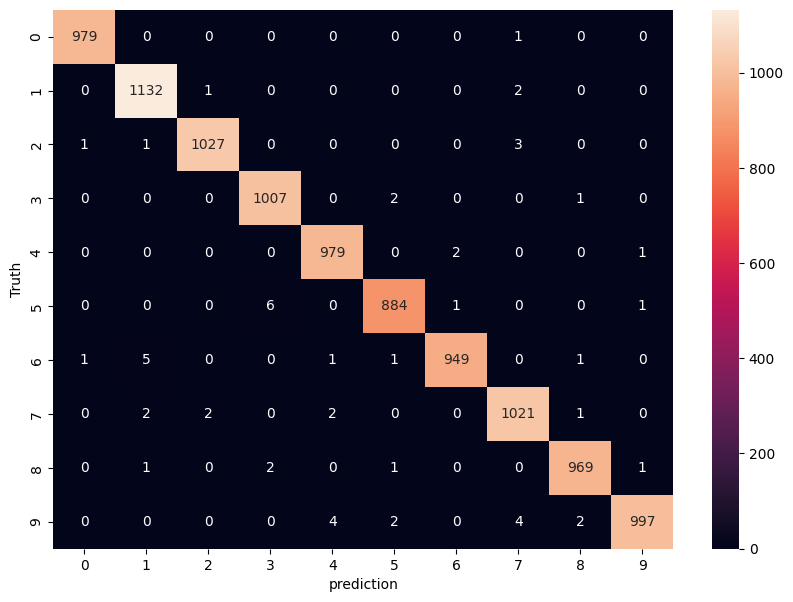

In [37]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')

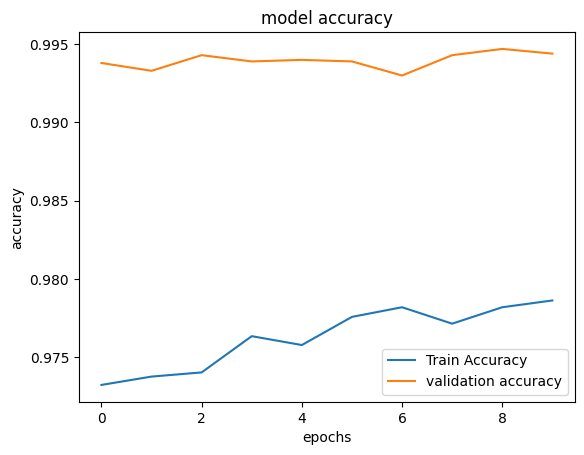

In [40]:
%matplotlib inline
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

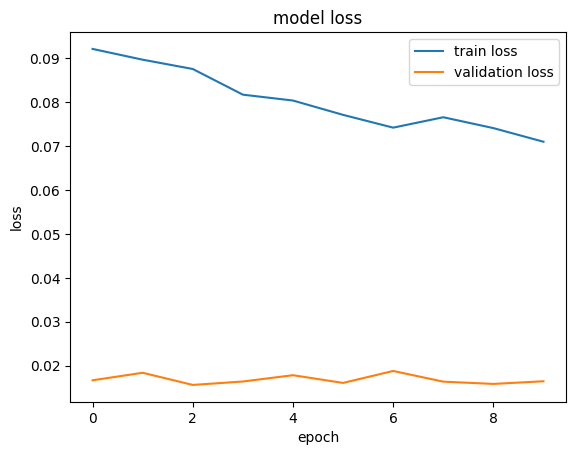

In [45]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:

model.save("mnist_cnn_model.h5")
print("Model saved!")


Model saved!
